<a href="https://colab.research.google.com/github/WisdomerLee/Pytorch/blob/main/6DataPreprocessExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preprocess(MNIST)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

데이터 불러오기
Tensorflow에서 제공해주는 데이터셋(MNIST)예제 불러오기

In [ ]:
from tensorflow.keras import datasets

데이터 shape 확인하기

In [ ]:
mnist = datasets.mnist

In [ ]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [ ]:
train_x.shape

(60000, 28, 28)

Image Dataset 들여다보기
불러온 데이터셋에서 이미지 데이터 하나만 뽑아서 시각화까지 확인
데이터 하나만 뽑기

In [ ]:
image = train_x[0]
image.shape

(28, 28)

시각화해서 확인

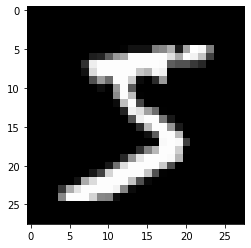

In [ ]:
plt.imshow(image, 'gray')
plt.show()

Channel 관련
[Batch Size, Height, Width, Channel]
GrayScale이면 1, RGB면 3으로 만들어주어야 함
shape로 데이터 확인

In [ ]:
train_x.shape

(60000, 28, 28)

데이터 차원수 늘리기(numpy)

In [ ]:
train_x = np.expand_dims(train_x, -1)
train_x.shape

(60000, 28, 28, 1)

Tensorflow 패키지 불러와 데이터 차원 숫자 늘리기(tensorflow)

In [ ]:
new_train_x = tf.expand_dims(train_x, -1)
new_train_x.shape

TensorShape([60000, 28, 28, 1, 1])

Tensorflow 공식 홈페이지: tf.newaxis

In [ ]:
train_x.shape

(60000, 28, 28, 1)

In [ ]:
train_x[..., tf.newaxis].shape

(60000, 28, 28, 1, 1)

In [ ]:
reshaped = train_x.reshape([60000, 28, 28])
reshaped.shape

(60000, 28, 28)

주의사항
matplotlib로 이미지 시각화 할 때는 gray scale의 그림은 3번째 dimension이 없으므로 2개의 dimension으로 gray scale로 차원 조절하여 넣어주어야 함
new_train_x[0] -> new_train_x[0,:, :,0]

In [ ]:
new_train_x = train_x[..., tf.newaxis]
new_train_x.shape

(60000, 28, 28, 1, 1)

In [ ]:
 np.squeeze(new_train_x[0]).shape

(28, 28)

In [ ]:
disp= np.squeeze(new_train_x[0])
disp.shape

(28, 28)

시각화

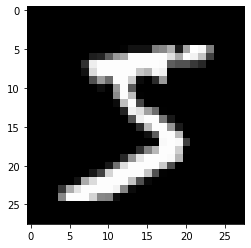

In [ ]:
plt.imshow(disp, 'gray')
plt.show()

Label Dataset 들여다보기
Label 하나를 열어서 Image와 비교하여 제대로 들어갔는지 어떤 식으로 저장되어있는지 확인
label 하나만 뽑아보기

In [ ]:
train_y.shape

(60000,)

In [ ]:
train_y[0], train_x[0]

(5,
 array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]

In [ ]:
train_y[0]

5

OneHot Encoding
컴퓨터가 이해할 수 있는 형태로 변환하여 Label을 주는 것
정규화 시키기...!
tensorflow.keras.utils.to_categorical

In [ ]:
# 5
[0,0,0,0,1,0,0,0,0]
#9
[0,0,0,0,0,0,0,0,1]


In [ ]:
from tensorflow.keras.utils import to_categorical

1을 예시로 one hot encoding

In [ ]:
to_categorical(5, 9)

array([0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
label = train_y[0]
label

5

In [ ]:
label_onehot = to_categorical(label, num_classes=10)
label_onehot

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

onehot encoding으로 바꾼 것과 이미지 확인

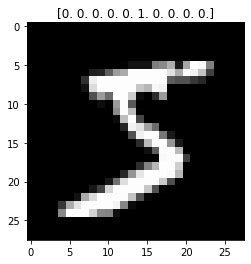

In [ ]:
plt.title(label_onehot)
plt.imshow(reshaped[0], 'gray')
plt.show()